<a href="https://colab.research.google.com/github/preethajagan3/mlproject/blob/main/Copy_of_ML_MINI_PROJECT_CARDIOVASCULAR_DISEASE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/cardio_train.fixed.csv')
data.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [ ]:
# Data overview
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
    id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  988  22469       1     155    69.0    130     80            2     2      0   
1  989  14648       1     163    71.0    110     70            1     1      0   
2  990  21901       1     165    70.0    120     80            1     1      0   
3  991  14549       2     165    85.0    120     80            1     1      1   
4  992  23393       1     155    62.0    120     80            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       1       0  
3     1       1       0  
4     0       1       0  


In [ ]:
# Data preprocessing
# Encoding categorical variables
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['cholesterol'] = le.fit_transform(data['cholesterol'])
data['gluc'] = le.fit_transform(data['gluc'])

In [ ]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])


In [ ]:
# Assuming 'cardio' is the target variable column name
# Replace 'cardio' with your actual target variable column name
y = data['cardio']

# Define features (X) - all columns except the target variable
X = data.drop('cardio', axis=1) # Replace 'cardio' with the actual target variable column name

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7271481134117308
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      6935
           1       0.74      0.70      0.72      6926

    accuracy                           0.73     13861
   macro avg       0.73      0.73      0.73     13861
weighted avg       0.73      0.73      0.73     13861

Confusion Matrix:
[[5205 1730]
 [2052 4874]]


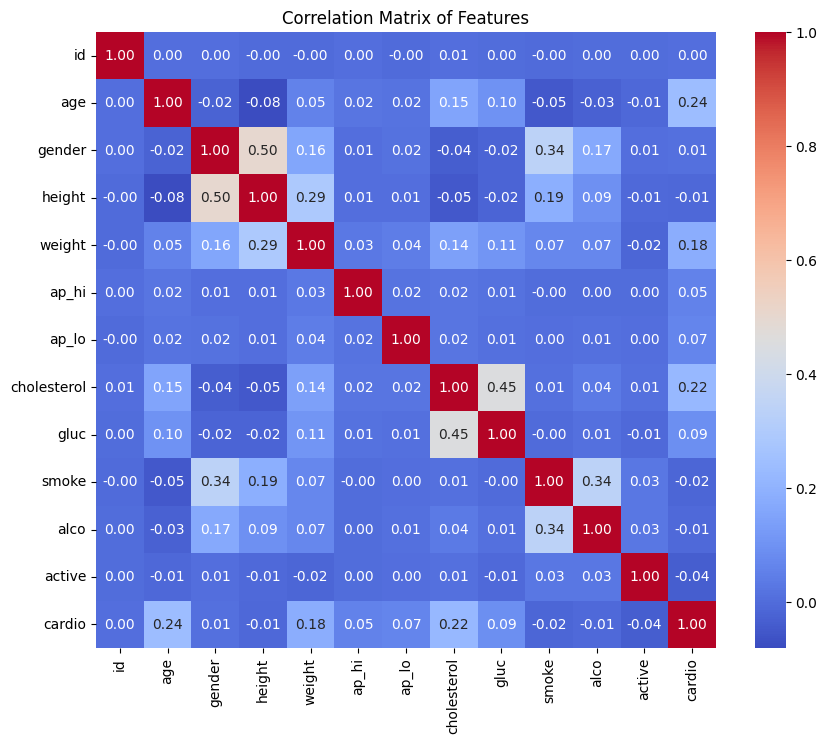

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

<Figure size 800x600 with 0 Axes>

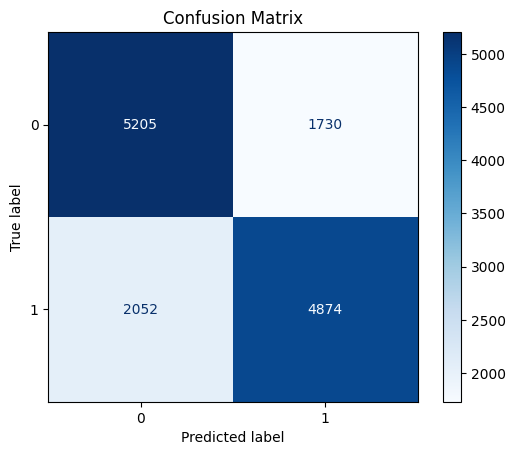

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


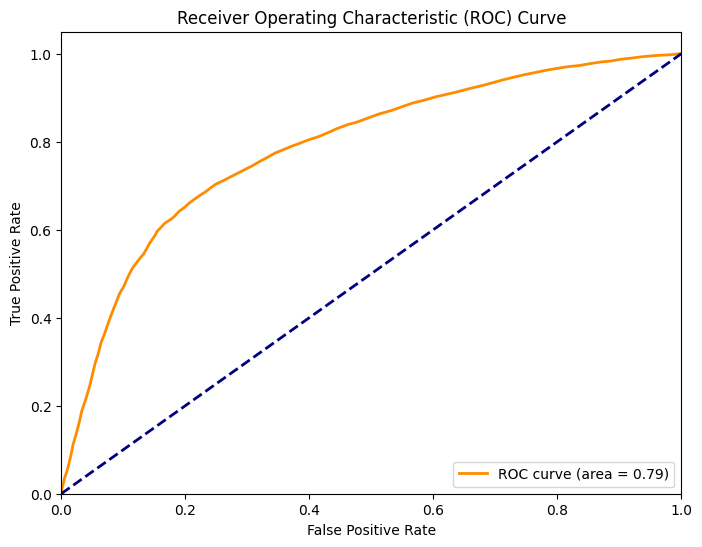

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Print the AUC score
print(f'AUC Score: {roc_auc}')


AUC Score: 0.7863332341629433


In [ ]:
!pip install pandas numpy scikit-learn mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.5 MB/s eta 0:00:00


In [ ]:
import mlflow
import mlflow.sklearn



In [ ]:
mlflow.set_tracking_uri("file:///content/mlruns")

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# Start MLflow run
with mlflow.start_run():
    # Log parameters
    mlflow.log_param("model_type", "RandomForestClassifier")
    mlflow.log_param("test_size", 0.2)

    # Step 1: Initialize and train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Step 2: Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class

    # Step 3: Evaluate the model with classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Step 4: Log metrics to MLflow
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("auc", auc)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    # Step 5: Log the trained model to MLflow
    mlflow.sklearn.log_model(model, artifact_path="random_forest_model")

    # Print evaluation results
    print("Model training and logging completed.")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"AUC Score: {auc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")


2024/11/11 06:39:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model training and logging completed.
Accuracy: 0.73
AUC Score: 0.79
Precision: 0.74
Recall: 0.70
F1 Score: 0.72


In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

# Start MLflow run
with mlflow.start_run():
    # Log parameters
    mlflow.log_param("model_type", "RandomForestClassifier")
    mlflow.log_param("test_size", 0.2)

    # Step 1: Initialize and train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Step 2: Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class

    # Step 3: Evaluate the model with classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Log metrics to MLflow
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("auc", auc)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    # Step 4: Calculate and log confusion matrix elements
    cm = confusion_matrix(y_test, y_pred)

    # Extract True Negatives, False Positives, False Negatives, True Positives
    tn, fp, fn, tp = cm.ravel()

    # Log each confusion matrix element as a separate metric
    mlflow.log_metric("True_Negatives", tn)
    mlflow.log_metric("False_Positives", fp)
    mlflow.log_metric("False_Negatives", fn)
    mlflow.log_metric("True_Positives", tp)

    # Log the entire confusion matrix as an artifact
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            mlflow.log_metric(f"confusion_matrix_{i}_{j}", cm[i, j])

    # Step 5: Log the classification report as an artifact (text file)
    report = classification_report(y_test, y_pred)
    with open("classification_report.txt", "w") as f:
        f.write(report)
    mlflow.log_artifact("classification_report.txt")

    # Log the trained model to MLflow
    mlflow.sklearn.log_model(model, artifact_path="random_forest_model")

    # Print evaluation results
    print("Model training and logging completed.")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)


2024/11/11 06:43:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model training and logging completed.

Confusion Matrix:
[[5205 1730]
 [2052 4874]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      6935
           1       0.74      0.70      0.72      6926

    accuracy                           0.73     13861
   macro avg       0.73      0.73      0.73     13861
weighted avg       0.73      0.73      0.73     13861

